    ## Wine dataset

* dataset: https://odds.cs.stonybrook.edu/wine-dataset/

* Dataset Information:

    > The original Wine dataset from UCI machine learning repository is a multiclass classification dataset having 13 attributes and 3 classes. These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. Class 2 and 3 are used as inliers and class 1 is downsampled to 10 instances to be used as ouliers.

**1. Dla każdego zbioru** badamy skuteczność wykrywania anomalii za pomocą 3 metod - np. podanych w tej instrukcji, można też użyć inne metody (np. kNN). Staramy się dostroić parametry detektora anomalii tak żeby uzyskać wysoką skuteczność metody.

**2. Opracowujemy raport z badań** - powinien zawierać miary skuteczności każdej badanej metody (ROC, AUC, FPR, TPR) oraz wpływ parametrów, które poddawaliśmy strojeniu.


In [1]:
# import libraries
from openset.tools import visualization_tool
from openset.models import lof, IRW_score, template
from openset.tools import dataset_tool
from sklearn.covariance import EllipticEnvelope

In [2]:
X_train, X_test, y_train, y_test = dataset_tool.load_data(data_path='../data/wine.mat', 
                                                          test_size=0.2, 
                                                          random_state=42)

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((103, 13), (103, 1), (26, 13), (26, 1))

### LOF - Local outlier factor

It's a density based unsupervised method which allows to define outlier by doing density-based scoring. The pipeline of this algorithm can be divided into 4 steps:

* K-Distance and K-Neighbors - We are trying to determine neighbourhood of size K and calculate distance between some point we are at and its k neighbours.
* Reachability distance - $\max \{k-distance(b), normal\_distance(a, b)\}$
* Local Reachability Density - Distance which we have to beat to go from one point to the next point or set of points. For all k closest neighbours of a, we calculate this values and latex we sum it and divide by the value of k. When the inverse of this value is taken, we calculate the density we are looking for. $Local\_reachability\_density (a) = \frac{1}{\frac{\sum(reachability\_distance(a, n)}{k}}$
* Local outlier factor: $$LOF(x_i)=\frac{\sum_{x_j\in N(x_i)}lrd(x_j)}{|N(x_i)|}\times \frac{1}{lrd(x_i)}$$

### GOOD ACCURACY

#### Training

In [4]:
lof_y_pred_train_g, lof_y_score_train_g, lof_model_g = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 17,
                                      contamination = 'auto',
                                      leaf_size = 25,
                                      metric = "minkowski",
                                      p = 1)

In [5]:
-1 * lof_model_g.negative_outlier_factor_

array([1.03362715, 1.00225954, 1.16182308, 1.7954899 , 1.04563044,
       0.98567448, 1.60061029, 1.6389801 , 0.9861431 , 0.98193037,
       1.02686481, 1.10735141, 1.07571757, 1.00758322, 1.36327107,
       1.02637847, 1.57367538, 1.0195886 , 1.15480705, 0.98445373,
       2.02640574, 0.99900853, 1.00904726, 1.55484317, 0.97800709,
       0.99090966, 0.98314699, 1.58249102, 1.0480021 , 1.5293884 ,
       1.14678439, 1.07250623, 0.98448337, 0.97240005, 0.98663196,
       0.96640413, 0.97239597, 0.97035271, 0.97370208, 1.52091489,
       0.98016339, 1.03571578, 0.97426699, 0.97238331, 2.23149926,
       0.98284017, 1.00900998, 1.85118428, 0.96423351, 1.04558211,
       1.18139934, 1.0946507 , 1.62458693, 1.0187572 , 0.98003456,
       1.05591911, 1.014408  , 0.9989033 , 0.97844473, 1.6333415 ,
       0.98561959, 1.08434123, 1.23906232, 1.09878747, 0.99680912,
       1.02069467, 0.98638079, 0.98493437, 1.02125449, 1.01262791,
       0.9913186 , 0.98337934, 0.96710549, 1.03350843, 1.06878

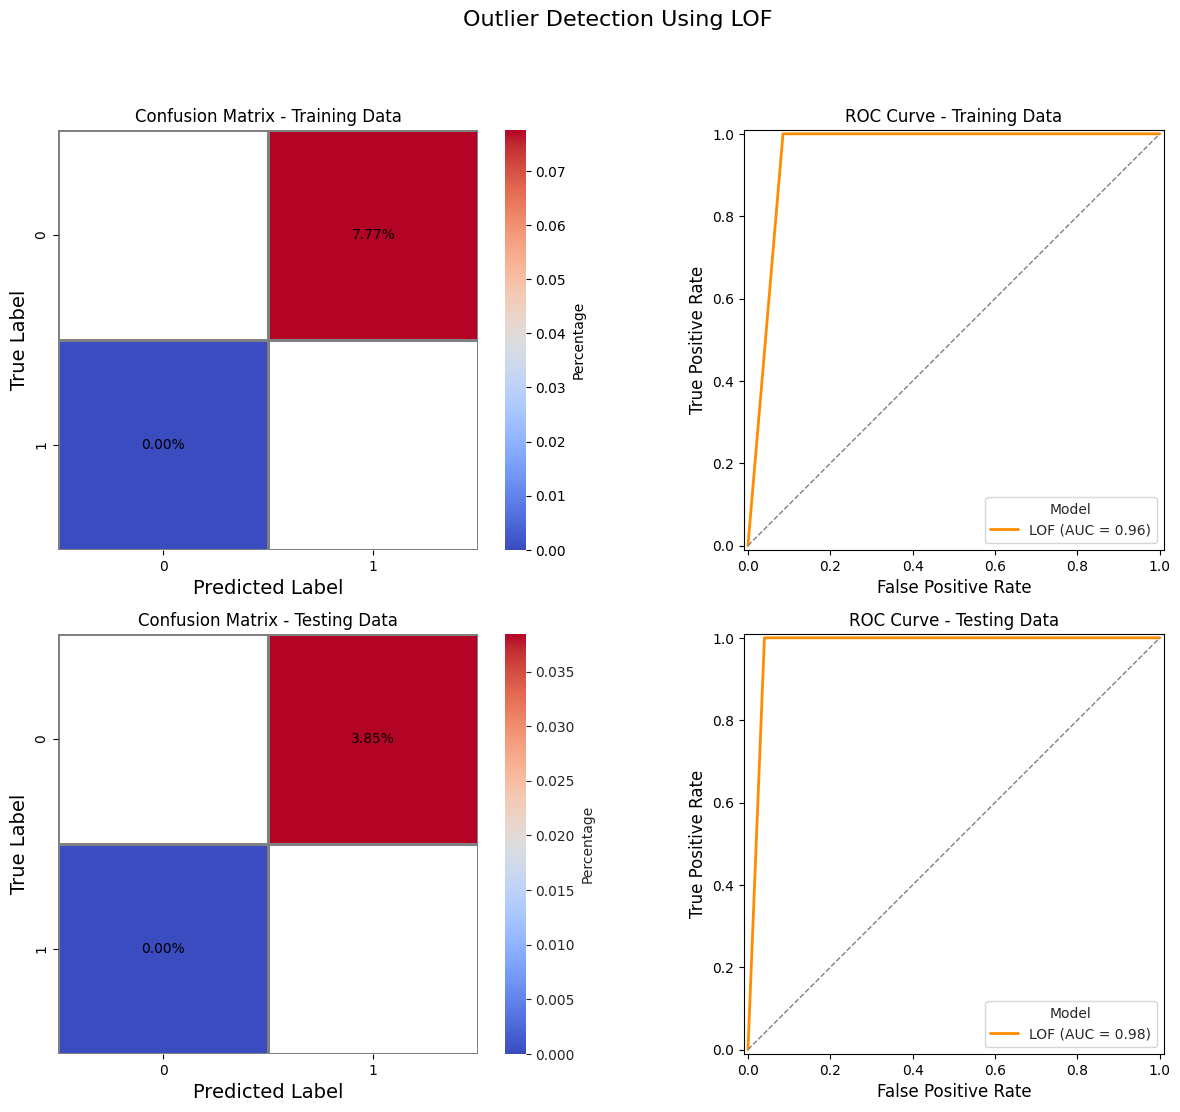

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [6]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test, 
                           train_pred=None, 
                           test_pred=None, 
                           novelty=False,
                           n_neighbors=17, 
                           contamination='auto', 
                           leaf_size=25, 
                           metric="minkowski", p=1)

In [7]:
df_subset_lof_train_good = dataset_tool.perform_tsne(X_train, y_train,
                                      lof_y_pred_train_g,
                                      n_components=3,
                                      random_state=42,
                                      verbose=False)

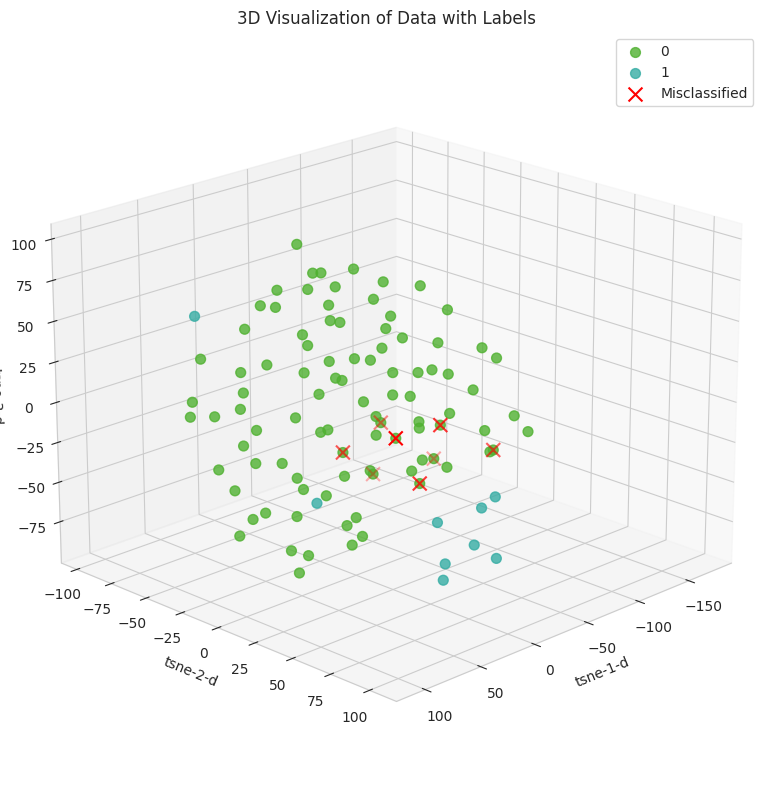

In [8]:
visualization_tool.visualize_data_3d(df_subset_lof_train_good, 
                                     "tsne-1-d", 
                                     "tsne-2-d", 
                                     "tsne-3-d", 
                                     "y", 
                                     df_subset_lof_train_good["y"].unique())

#### Test

In [14]:
lof_model_g.novelty = True
lof_y_pred_test_g = lof_model_g._predict(X_test)
lof_y_pred_test_g[lof_y_pred_test_g == 1] = 0  # inliers
lof_y_pred_test_g[lof_y_pred_test_g == -1] = 1  # outliers
df_subset_lof_test_good = dataset_tool.perform_tsne(X_test, y_test, 
                                              lof_y_pred_test_g,
                                              n_components=3,
                                              random_state=42,
                                              verbose=False,
                                              perplexity=len(X_test)-1)

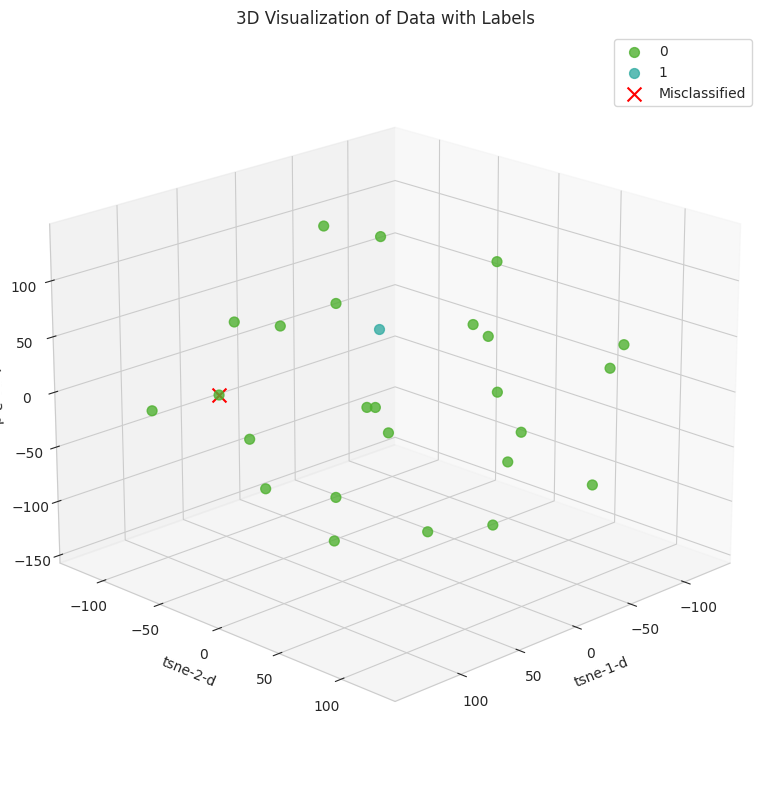

In [15]:
visualization_tool.visualize_data_3d(df_subset_lof_test_good, 
                                     "tsne-1-d", 
                                     "tsne-2-d", 
                                     "tsne-3-d", 
                                     "y", 
                                     df_subset_lof_test_good["y"].unique())

### Bad Accuracy

#### Train

In [22]:
lof_y_pred_train_b, lof_y_score_train_b, lof_model_b = lof.detect_outliers(X_train,
                                      novelty = False,
                                      n_neighbors = 2,
                                      contamination = 'auto',
                                      leaf_size = 2,
                                      metric = "minkowski",
                                      p = 2)

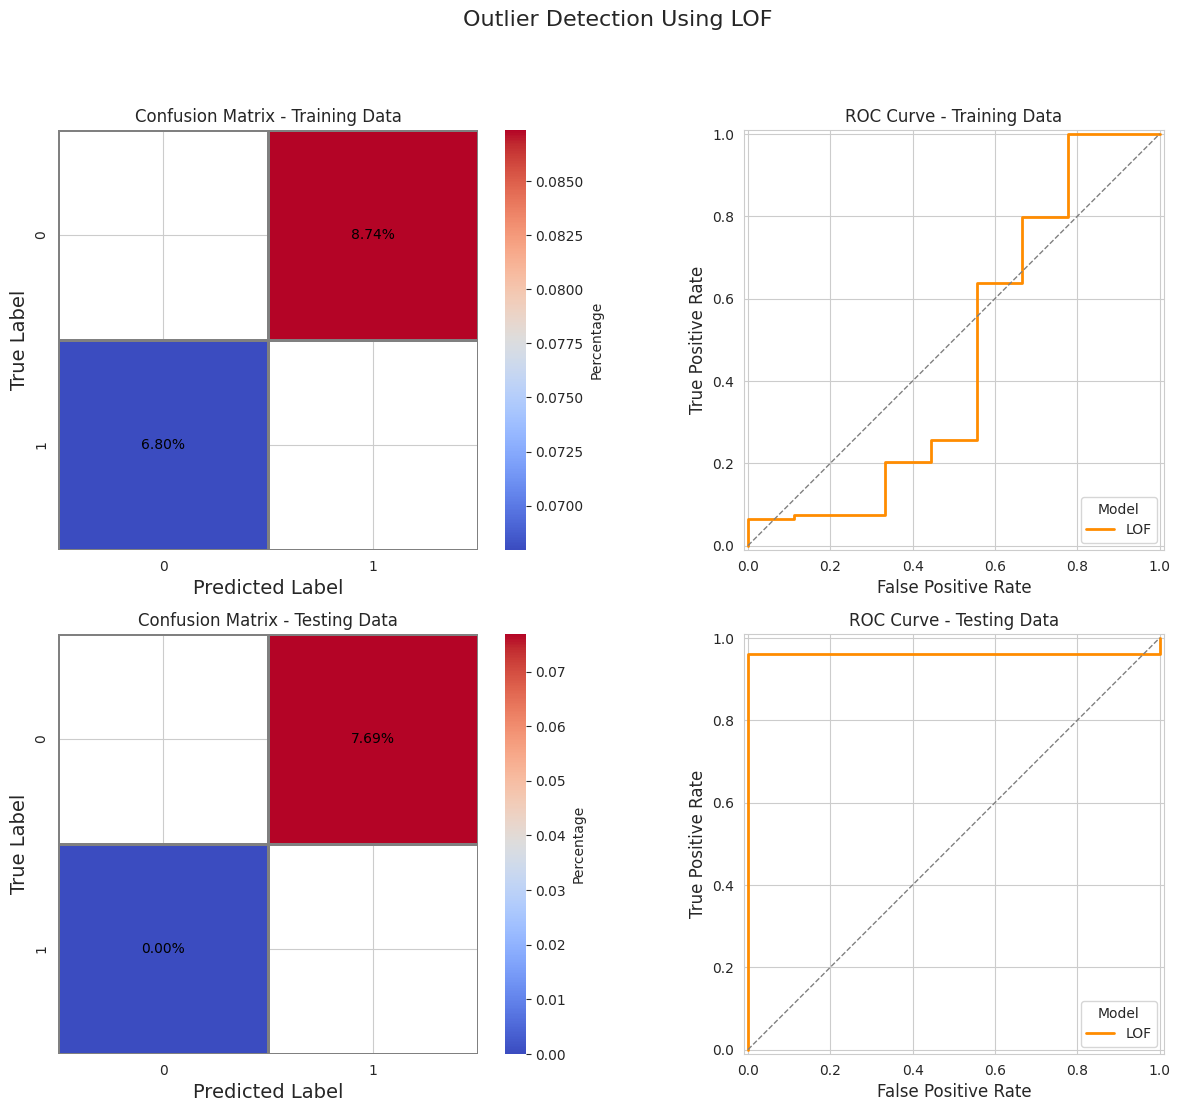

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

In [23]:
lof.visualize_outliers_lof(X_train, X_test, y_train, y_test, 
                           train_pred=None, 
                           test_pred=None, 
                           novelty=False,
                           n_neighbors=2, 
                           contamination='auto', 
                           leaf_size=2, 
                           metric="minkowski", p=2)

In [25]:
df_subset_lof_train_bad = dataset_tool.perform_tsne(X_train, y_train,
                                      lof_y_pred_train_b,
                                      n_components=3,
                                      random_state=42,
                                      verbose=False)

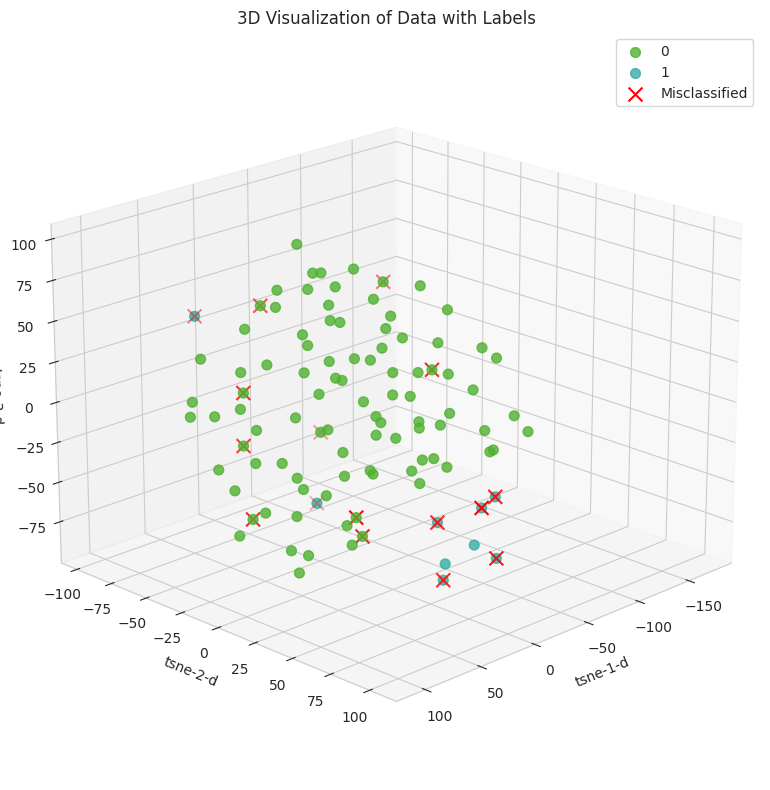

In [26]:
visualization_tool.visualize_data_3d(df_subset_lof_train_bad, 
                                     "tsne-1-d", 
                                     "tsne-2-d", 
                                     "tsne-3-d", 
                                     "y", 
                                     df_subset_lof_train_bad["y"].unique())

#### Test

In [15]:
lof_model_b.novelty = True
lof_y_pred_test_b = lof_model_b._predict(X_test)
lof_y_pred_test_b[lof_y_pred_test_b == 1] = 0  # inliers
lof_y_pred_test_b[lof_y_pred_test_b == -1] = 1  # outliers
df_subset_lof_test_bad = dataset_tool.perform_tsne(X_test, y_test, 
                                              lof_y_pred_test_b,
                                              n_components=3,
                                              random_state=42,
                                              verbose=False,
                                              perplexity=len(X_test)-1)

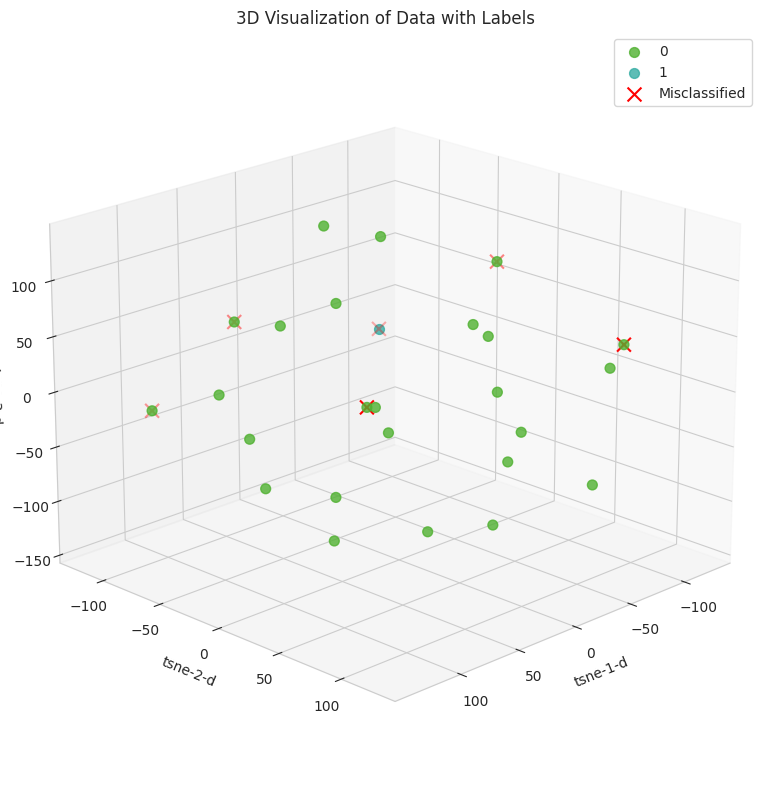

In [27]:
visualization_tool.visualize_data_3d(df_subset_lof_test_bad, 
                                     "tsne-1-d", 
                                     "tsne-2-d", 
                                     "tsne-3-d", 
                                     "y", 
                                     df_subset_lof_test_bad["y"].unique())

### IRW

In [8]:
model = IRW_score.IRWdepth()


train_scores, test_scores, ood_scores = template.fit_and_score_model(model, 
                                                                      X_train, 
                                                                      X_test, 
                                                                      y_train)
    

fitted IRWdepth model with 1000 projections in 103 dimensions
Model fitting completed in 0.01 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


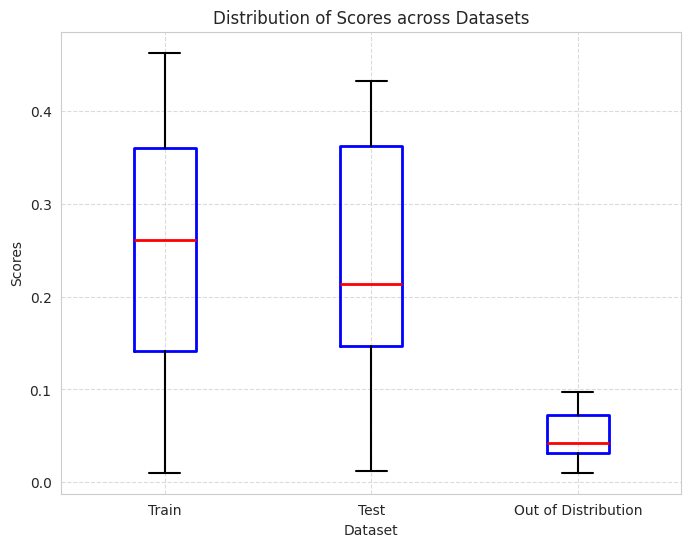

In [9]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)

### Mahalanobis distance

In [10]:
model = EllipticEnvelope(contamination=0.15, random_state=42)


In [11]:
model.fit(X_train, y_train)

EllipticEnvelope(contamination=0.15, random_state=42)

In [12]:
model.score(X_train, y_train)

0.02912621359223301

In [13]:
model.score(X_test, y_test)

0.0

In [14]:
y_pred = model.predict(X_train)

In [15]:
y_pred[y_pred == 1] = 0  # inliers
y_pred[y_pred == -1] = 1  # outliers

In [81]:
train_scores, test_scores, ood_scores = template.fit_and_score_model(model, 
                                                                     X_train, 
                                                                     X_test, 
                                                                     y_train)

Model fitting completed in 0.04 seconds.
Scoring train data...
Scoring test data...
Scoring out-of-distribution data...


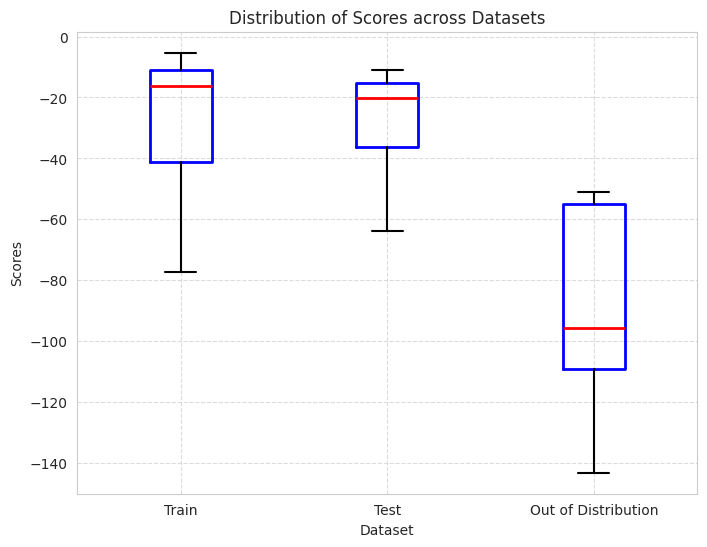

In [82]:
visualization_tool.plot_boxplot(train_scores, test_scores, ood_scores)